In [3]:
import numpy as np 
import matplotlib.pyplot as plt  #pip install matplotlib
from scipy.integrate import odeint #pip install scipy

### Rabbits in a grass field
Consider **two populations**, rabbits and grass. For example, a colony of rabbits living in a grass field. Their population starts out small (2 rabbits) but they quickly reproduce and the population of rabbits **grows exponentially** (with growth rate = 0.002) . However there is only a **limited amount of grass** (1000 units of grass) and each time they reproduce grass gets eaten and will not grow again. We assume that rabbits and grass **do not die**.

To simulate this simple system, we will follow the rate of change of two population, rabbits and grass, described by the following ODE:  

$$ {dRabbits \over dt} = {r.Rabbits.Grass } $$  

$$ {dGrass \over dt} = {- r.Rabbits.Grass }  $$  

Let's simulate this ODE system using odeint. First, we define our ODE model using `def`. 

In [4]:
def model(Y,t,r): #the initials conditions of the populations have to be stored in a list
    Rabbits0,grass0=Y #unpack the input list
    drabbitsdt = r*Rabbits0*grass0 
    dgrassdt = -r*Rabbits0*grass0
    return (drabbitsdt,dgrassdt) #in a system of ODE, you return all derivatives in a list

Assign our initial conditions: Initial amount of rabbits and grass, growth rate of the rabbit population, and a list of timepoints.

In [5]:
Rabbits0=2
grass0=1000
Y0=(Rabbits0,grass0) #we pack both initial population sizes in a list, Y0.

r=0.002

t=np.linspace(0,10,num=100)

Now simulate using odeint from scipy.integrate and plot both populations.

In [6]:
y_odeint=odeint(model,Y0,t,args=(r,))

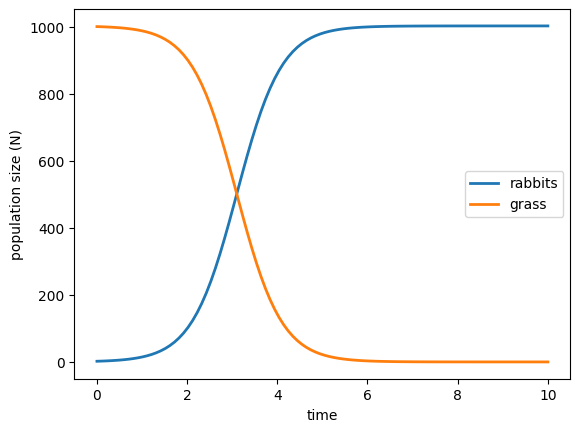

In [7]:
rabbits,grass=np.array(y_odeint).T

plt.plot(t,rabbits,label='rabbits',linewidth=2.0) #plot odeint results
plt.plot(t,grass,label='grass',linewidth=2.0) #plot odeint results
plt.xlabel('time')
plt.ylabel('population size (N)')
plt.legend()